# Description

Generates a plot with the top traits and traits categories for LV603 (a neutrophil-termed latent variable in MultiPLIER).

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import conf

In [3]:
assert (
    conf.MANUSCRIPT["BASE_DIR"] is not None
), "The manuscript directory was not configured"

display(conf.MANUSCRIPT["BASE_DIR"])

'/opt/manuscript'

# Settings

In [4]:
LV_NUMBER_SELECTED = 603
LV_NAME_SELECTED = f"LV{LV_NUMBER_SELECTED}"
display(LV_NAME_SELECTED)

'LV603'

In [5]:
OUTPUT_FIGURES_DIR = Path(conf.MANUSCRIPT["FIGURES_DIR"], "entire_process").resolve()
display(OUTPUT_FIGURES_DIR)
OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

PosixPath('/opt/manuscript/content/images/entire_process')

# Load data

In [6]:
input_filepath = Path(
    conf.RESULTS["PROJECTIONS_DIR"],
    "projection-smultixcan-efo_partial-mashr-zscores.pkl",
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

PosixPath('/opt/data/results/projections/projection-smultixcan-efo_partial-mashr-zscores.pkl')

In [7]:
data = pd.read_pickle(input_filepath)

In [8]:
data.shape

(987, 3752)

In [9]:
data.head()

,100001_raw-Food_weight,100002_raw-Energy,100003_raw-Protein,100004_raw-Fat,100005_raw-Carbohydrate,100006_raw-Saturated_fat,100007_raw-Polyunsaturated_fat,100008_raw-Total_sugars,100009_raw-Englyst_dietary_fibre,100010-Portion_size,...,visual impairment,vitiligo,vitreous body disease,vocal cord polyp,voice disorders,wellbeing measurement AND family relationship,wheezing,whooping cough,worry measurement,wrist fracture
LV1,-0.021292,-0.046815,-0.021585,-0.030324,-0.017773,-0.007844,-0.015529,-0.011609,-0.051342,-0.036813,...,-0.001614,0.002102,-0.005318,-0.003041,0.012873,-0.015951,-0.018904,0.009576,0.019755,0.010027
LV2,0.056061,-0.009864,-0.028888,-0.053573,0.006951,-0.054597,-0.030748,0.014519,-0.026933,0.009024,...,-0.029614,-0.033636,0.020768,0.010656,-0.013305,0.050738,0.012085,-0.032372,-0.024540,-0.002616
LV3,0.001650,-0.004262,0.019211,0.007484,0.004548,0.006548,0.006741,-0.005634,-0.022129,-0.017256,...,0.010539,-0.019591,-0.013391,-0.044369,0.020142,0.006052,0.020869,0.043931,0.058049,-0.013144
LV4,0.026265,-0.007235,0.004304,-0.042464,-0.001093,-0.041208,-0.051179,0.009060,-0.003999,-0.005874,...,-0.018162,0.012136,-0.046232,-0.030949,-0.040147,0.044545,0.009865,-0.049828,-0.013725,0.024988
LV5,-0.015616,0.010799,0.017792,0.010591,0.001972,0.040024,-0.027612,-0.001540,0.033072,0.009477,...,0.030632,-0.023253,0.015853,-0.002222,0.019385,-0.015501,-0.031477,-0.002554,-0.032620,0.017731


# Show LV traits

In [10]:
from entity import Trait

In [11]:
# Show related traits
lv_traits = data.loc[LV_NAME_SELECTED].sort_values(ascending=False)
display(lv_traits.head(20))

30220_raw-Basophill_percentage                                   0.181608
30130_raw-Monocyte_count                                         0.158166
30000_raw-White_blood_cell_leukocyte_count                       0.146061
myeloid white cell count                                         0.133998
leukocyte count                                                  0.131486
sum of neutrophil and eosinophil counts                          0.128405
granulocyte count                                                0.128316
sum of basophil and neutrophil counts                            0.126586
neutrophil count                                                 0.125868
30160-Basophill_count                                            0.122953
30180_raw-Lymphocyte_percentage                                  0.119818
30140_raw-Neutrophill_count                                      0.113055
monocyte count                                                   0.113054
20003_1140875420-Treatmentmedication_c

# Remove repeated traits

Here I remove traits that represent the same phenotype. I remove the least significant trait from duplicates.

In [12]:
lv_traits_to_remove = [
    "leukocyte count",
    "30140_raw-Neutrophill_count",
    "monocyte count",
]

In [13]:
_old_len = lv_traits.shape[0]
lv_traits = lv_traits.drop(lv_traits_to_remove)
assert lv_traits.shape[0] == _old_len - len(lv_traits_to_remove)
display(lv_traits.shape)

(3749,)

# Rename LV traits

In [14]:
lv_traits = lv_traits.reset_index().rename(columns={"index": "traits"})

In [15]:
lv_traits

,traits,LV603
0,30220_raw-Basophill_percentage,0.181608
1,30130_raw-Monocyte_count,0.158166
2,30000_raw-White_blood_cell_leukocyte_count,0.146061
3,myeloid white cell count,0.133998
4,sum of neutrophil and eosinophil counts,0.128405
...,...,...
3744,benign ovarian neoplasm,-0.072049
3745,20003_1141146188-Treatmentmedication_code_lata...,-0.077001
3746,30260_raw-Mean_reticulocyte_volume,-0.081312
3747,M13_SHOULDER-Shoulder_lesions,-0.081334


In [16]:
lv_traits = lv_traits.replace(
    {
        "traits": {
            t: (
                Trait.get_traits_from_efo(t)[0].description
                if Trait.is_efo_label(t)
                else Trait.get_trait(full_code=t).description
            )
            for t in lv_traits["traits"].values
        }
    }
)

In [17]:
lv_traits.head(10)

,traits,LV603
0,Basophill percentage,0.181608
1,Monocyte count,0.158166
2,White blood cell (leukocyte) count,0.146061
3,Myeloid White Cell Count,0.133998
4,Sum Neutrophil Eosinophil Count,0.128405
5,Granulocyte Count,0.128316
6,Sum Basophil Neutrophil Count,0.126586
7,Neutrophil Count,0.125868
8,Basophill count,0.122953
9,Lymphocyte percentage,0.119818


In [18]:
lv_traits = lv_traits.replace(
    {
        "traits": {
            "Neutrophil Count": "Neutrophil #",
            "Monocyte count": "Monocyte #",
            "Basophill count": "Basophil #",
            "White blood cell (leukocyte) count": "Leukocyte #",
            "Basophill percentage": "Basophil %",
            "Lymphocyte percentage": "Lymphocyte %",
            "Neutrophill percentage": "Neutrophil %",
            "Mean platelet (thrombocyte) volume": "Mean platelet volume",
            "Myeloid White Cell Count": "Myeloid white cell #",
            "Sum Neutrophil Eosinophil Count": "Neutrophil+Eosinophil #",
            "Granulocyte Count": "Granulocyte #",
            #     'Platelet crit': 'PCT',
            "Sum Basophil Neutrophil Count": "Basophil+Neutrophil #",
        }
    }
)

In [19]:
lv_traits.head(10)

,traits,LV603
0,Basophil %,0.181608
1,Monocyte #,0.158166
2,Leukocyte #,0.146061
3,Myeloid white cell #,0.133998
4,Neutrophil+Eosinophil #,0.128405
5,Granulocyte #,0.128316
6,Basophil+Neutrophil #,0.126586
7,Neutrophil #,0.125868
8,Basophil #,0.122953
9,Lymphocyte %,0.119818


# Plot

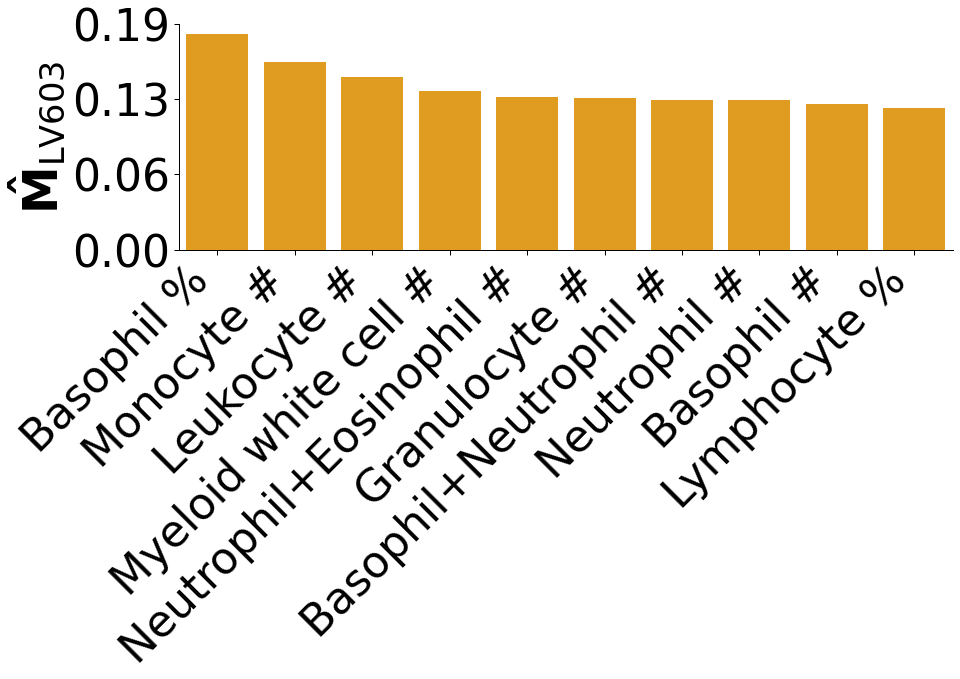

In [20]:
with sns.plotting_context("paper", font_scale=5.0):
    g = sns.catplot(
        data=lv_traits.rename(
            columns={
                "traits": "Traits",
            }
        ).head(10),
        x="Traits",
        y=LV_NAME_SELECTED,
        kind="bar",
        aspect=2.6,
        height=6,  # ci=None, height=6, aspect=1.6, legend_out=False,
        color="orange",
    )

    g.ax.set_ylabel(f"$\mathbf{{\hat{{M}}}}_{{\mathrm{{LV}}{LV_NUMBER_SELECTED}}}$")
    g.set_xticklabels(g.ax.get_xticklabels(), rotation=45, horizontalalignment="right")
    # g.set_yticklabels([])
    g.ax.yaxis.set_major_locator(ticker.LinearLocator(4))
    g.ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    g.ax.set_xlabel("")

    # save figure
    plt.savefig(Path(OUTPUT_FIGURES_DIR, "lv603_traits.pdf"), bbox_inches="tight")